Initialization

In [105]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

def dfminmax(dataframe, columns):
    for column in columns:
        min = dataframe[column].min()
        max = dataframe[column].max()
        dataframe[column] = (dataframe[column] - min)/(max - min)

dataframe = pd.read_csv("AusApparalSales4thQrt2020.csv", parse_dates=["Date"])

In [106]:
dataframe.head()

,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500


In [107]:
print(dataframe.isna().sum()) #Check for null values


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [108]:
dataframe.dropna() #Data Cleaning


,Date,Time,State,Group,Unit,Sales
0,2020-10-01,Morning,WA,Kids,8,20000
1,2020-10-01,Morning,WA,Men,8,20000
2,2020-10-01,Morning,WA,Women,4,10000
3,2020-10-01,Morning,WA,Seniors,15,37500
4,2020-10-01,Afternoon,WA,Kids,3,7500
...,...,...,...,...,...,...
7555,2020-12-30,Afternoon,TAS,Seniors,14,35000
7556,2020-12-30,Evening,TAS,Kids,15,37500
7557,2020-12-30,Evening,TAS,Men,15,37500
7558,2020-12-30,Evening,TAS,Women,11,27500


In [109]:
scaleddata = dataframe.copy()
scaler = preprocessing.MinMaxScaler()
dfminmax(scaleddata, ['Unit', 'Sales']) #Data Scaling

In [110]:
print('--Sales by State and Group--')
groupeddata = dataframe.copy().groupby(['State', 'Group'])
print(groupeddata['Sales'].sum())

--Sales by State and Group--
State  Group  
NSW    Kids       18587500
       Men        19022500
       Seniors    18187500
       Women      19172500
NT     Kids        5700000
       Men         5762500
       Seniors     5465000
       Women       5652500
QLD    Kids        8510000
       Men         8392500
       Seniors     8190000
       Women       8325000
SA     Kids       14515000
       Men        14655000
       Seniors    14717500
       Women      14970000
TAS    Kids        5775000
       Men         5757500
       Seniors     5650000
       Women       5577500
VIC    Kids       26360000
       Men        26407500
       Seniors    26315000
       Women      26482500
WA     Kids        5625000
       Men         5752500
       Seniors     5512500
       Women       5262500
Name: Sales, dtype: int64


In [111]:
print('--Sales by Group--')
groupeddata = dataframe.copy().groupby(['Group'])
max = 0
maxstr = ""
min = float('inf')
minstr = ""
for group, subdf in groupeddata:
    print(str(group[0]) + ": " + str(subdf['Sales'].sum()))
    print("-------------------------")
    if int(subdf['Sales'].sum()) > max:
        max = int(subdf['Sales'].sum())
        maxstr = str(group[0])
    if int(subdf['Sales'].sum()) < min:
        min = int(subdf['Sales'].sum())
        minstr = str(group[0])

print('Most sales made in group: ' + maxstr)
print('Least sales made in group: ' + minstr)

--Sales by Group--
 Kids: 85072500
-------------------------
 Men: 85750000
-------------------------
 Seniors: 84037500
-------------------------
 Women: 85442500
-------------------------
Most sales made in group:  Men
Least sales made in group:  Seniors


In [112]:
print(f'Mean: {dataframe[['Sales', 'Unit']].mean()}')

Mean: Sales    45013.558201
Unit        18.005423
dtype: float64


In [113]:
print(f'Median: {dataframe[['Sales', 'Unit']].median()}')

Median: Sales    35000.0
Unit        14.0
dtype: float64


In [114]:
print(f'Mode: {dataframe[['Sales', 'Unit']].mode()}')

Mode:    Sales  Unit
0  22500     9


In [115]:
print(f'Standard Deviation: {dataframe[['Sales', 'Unit']].std()}')

Standard Deviation: Sales    32253.506944
Unit        12.901403
dtype: float64


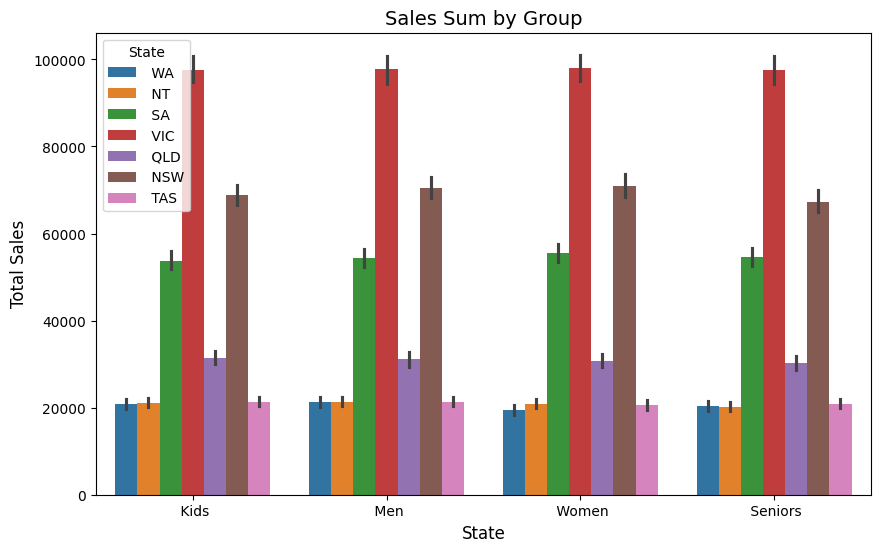

In [116]:
g = dataframe.groupby(['State', 'Group'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='Group', y='Sales', hue='State', data=dataframe)

plt.title('Sales Sum by Group', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.show()

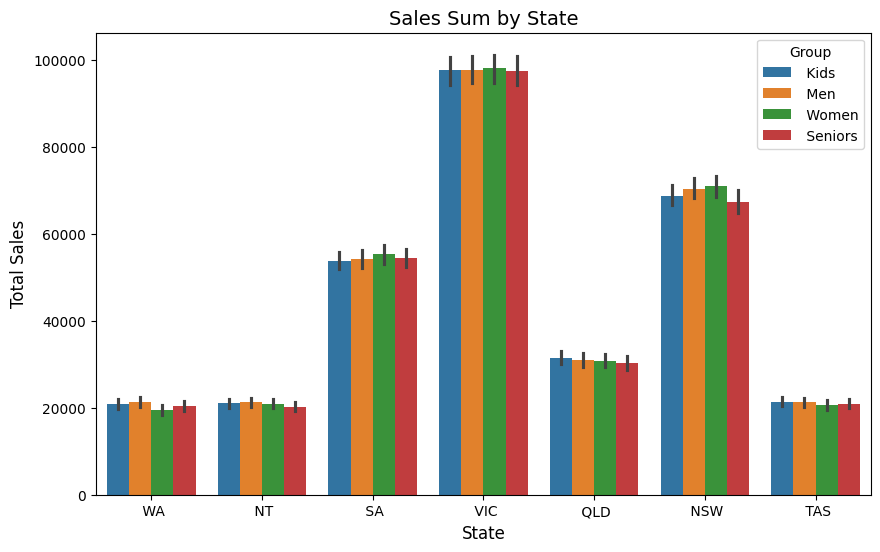

In [117]:
g = dataframe.groupby(['State', 'Group'])['Sales'].sum().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x='State', y='Sales', hue='Group', data=dataframe)

plt.title('Sales Sum by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.show()

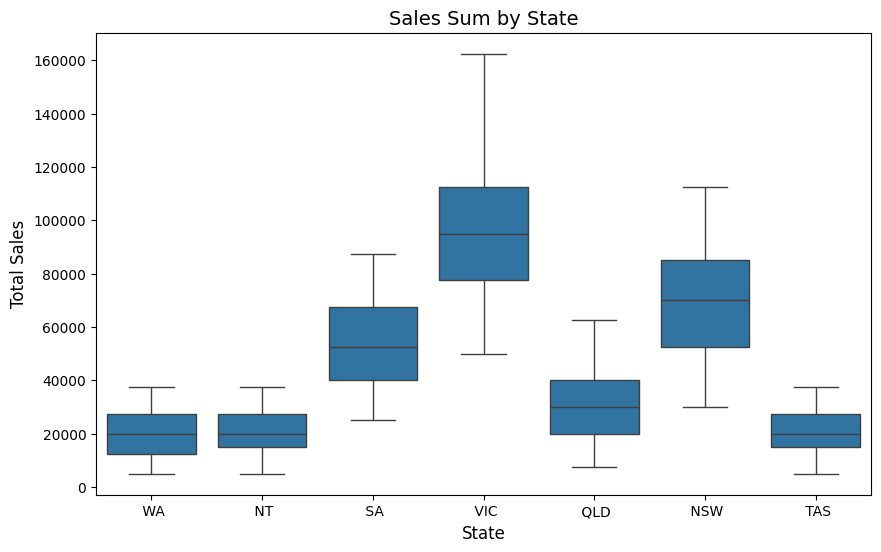

In [118]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='State', y='Sales', data=dataframe)

plt.title('Sales Sum by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.show()

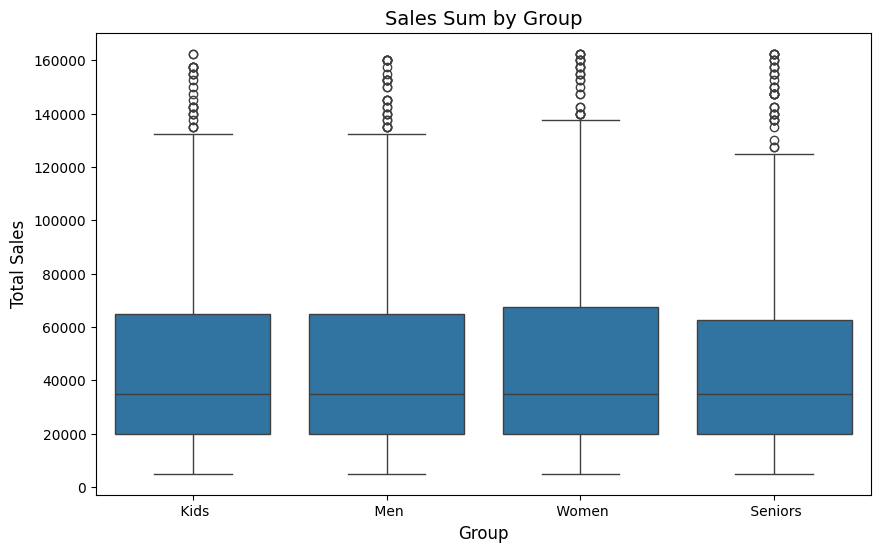

In [119]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Group', y='Sales', data=dataframe)

plt.title('Sales Sum by Group', fontsize=14)
plt.xlabel('Group', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)

plt.show()

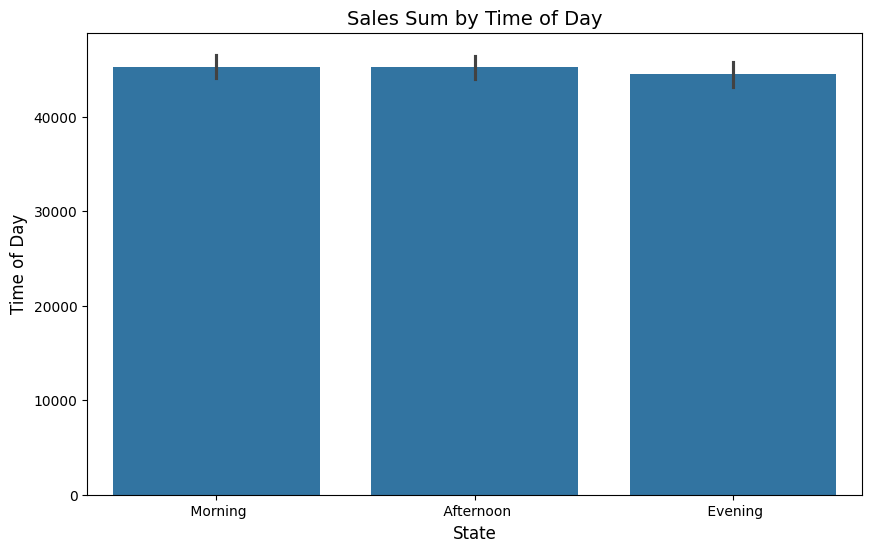

In [120]:
g = dataframe.groupby(['Time'])['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))

sns.barplot(x='Time', y='Sales', data=dataframe)

plt.title('Sales Sum by Time of Day', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Time of Day', fontsize=12)

plt.show()

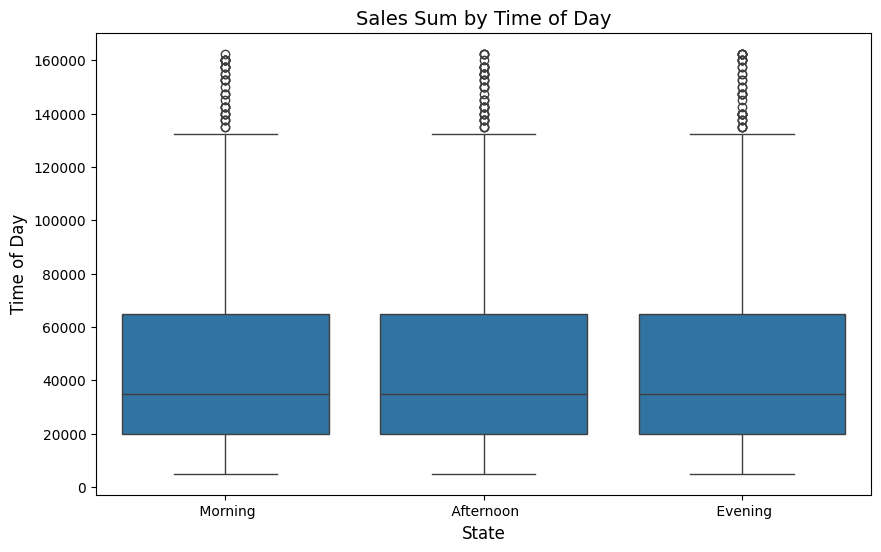

In [121]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='Time', y='Sales', data=dataframe)

plt.title('Sales Sum by Time of Day', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Time of Day', fontsize=12)

plt.show()